In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
%matplotlib inline
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
# NLTK Stop words (insert the stop words you prefer or you can use the list uploaded under the file name: function-ar)

mylist= [...]

from nltk.corpus import stopwords
stop_words = mylist

In [3]:
df = pd.read_csv(r'C:\\Users\\snmuj\\Documents\\TopicModelling_Man-Woman\\LDATopicModelling-main\\M_A.csv')
df = df.head(4786)
df.dropna()
print(df.Score.unique())
df.head()

[1]


,Id,Score,Text
0,1,1,الرجل المسلم الشرعية وممارسة الضغط على حدد مسؤ...
1,2,1,الرسول عليه السلام كل بيمينك قال الرجل
2,3,1,بينهما بعد ان تم زواج الرجل الكبير في السن الذ...
3,4,1,هذا الرجل من بكاء خوفا من محبوبته وحزنا
4,5,1,الرجل لا يكفي لنكتب من قصائدنا الجديدة


In [4]:
# Convert to list
data = df.Text.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['الرجل المسلم الشرعية وممارسة الضغط على حدد مسؤولية الرجل على الإنفاق والرفق '
 'ضعف محكومية الرجل وفي عام م وجد ومتدرجة في حجم الضرر من قبل الرجل في المنزل '
 'هو الرجل فهي تتقاضى راتبا ومزايا أقل من الرجل بالرغم من حصولها على نفس '
 'المؤهل وتعمل بنفس الوظيفة التي يشغلها الرجل الزنا واللواط والإجهاض وزواج '
 'الرجل بالرجل العلاقات والدور والتوازن بين الرجل والمرأة ']


In [5]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['الرجل', 'المسلم', 'الشرعية', 'وممارسة', 'الضغط', 'على', 'حدد', 'مسؤولية', 'الرجل', 'على', 'الإنفاق', 'والرفق', 'ضعف', 'محكومية', 'الرجل', 'وفي', 'عام', 'وجد', 'ومتدرجة', 'في', 'حجم', 'الضرر', 'من', 'قبل', 'الرجل', 'في', 'المنزل', 'هو', 'الرجل', 'فهي', 'تتقاضى', 'راتبا', 'ومزايا', 'أقل', 'من', 'الرجل', 'بالرغم', 'من', 'حصولها', 'على', 'نفس', 'المؤهل', 'وتعمل', 'بنفس', 'الوظيفة', 'التي', 'يشغلها', 'الرجل', 'الزنا', 'واللواط', 'والإجهاض', 'وزواج', 'الرجل', 'بالرجل', 'العلاقات', 'والدور', 'والتوازن', 'بين', 'الرجل', 'والمرأة']]


In [6]:
# Build the bigram and trigram models
# bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
# trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
# bigram_mod = gensim.models.phrases.Phraser(bigram)
# trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
# print(trigram_mod[bigram_mod[data_words[0]]])

In [7]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in mylist] for doc in texts]

#def make_bigrams(texts):
   # return [bigram_mod[doc] for doc in texts]

#def make_trigrams(texts):
 #   return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [8]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
#data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en

nlp = spacy.load('xx_ent_wiki_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

#print(data_lemmatized[:1])
print(data_words_nostops[:1])

[['المسلم', 'الشرعية', 'وممارسة', 'الضغط', 'حدد', 'مسؤولية', 'الإنفاق', 'والرفق', 'ضعف', 'محكومية', 'وجد', 'ومتدرجة', 'حجم', 'الضرر', 'المنزل', 'تتقاضى', 'راتبا', 'ومزايا', 'بالرغم', 'حصولها', 'نفس', 'المؤهل', 'وتعمل', 'بنفس', 'الوظيفة', 'يشغلها', 'الزنا', 'واللواط', 'والإجهاض', 'وزواج', 'العلاقات', 'والدور', 'والتوازن']]


C:\Users\snmuj\anaconda3\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'xx_ent_wiki_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [9]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_nostops)

# Create Corpus
texts = data_words_nostops

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)]]


In [10]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:4]]

[[('الإنفاق', 1),
  ('الزنا', 1),
  ('الشرعية', 1),
  ('الضرر', 1),
  ('الضغط', 1),
  ('العلاقات', 1),
  ('المؤهل', 1),
  ('المسلم', 1),
  ('المنزل', 1),
  ('الوظيفة', 1),
  ('بالرغم', 1),
  ('بنفس', 1),
  ('تتقاضى', 1),
  ('حجم', 1),
  ('حدد', 1),
  ('حصولها', 1),
  ('راتبا', 1),
  ('ضعف', 1),
  ('محكومية', 1),
  ('مسؤولية', 1),
  ('نفس', 1),
  ('والإجهاض', 1),
  ('والتوازن', 1),
  ('والدور', 1),
  ('والرفق', 1),
  ('واللواط', 1),
  ('وتعمل', 1),
  ('وجد', 1),
  ('وزواج', 1),
  ('ومتدرجة', 1),
  ('ومزايا', 1),
  ('وممارسة', 1),
  ('يشغلها', 1)],
 [('الرسول', 1), ('بيمينك', 1)],
 [('الجماع', 1),
  ('السن', 1),
  ('الكبير', 1),
  ('المحكمة', 1),
  ('بعدد', 1),
  ('حكم', 1),
  ('زواج', 1),
  ('سنة', 1),
  ('لشكوى', 2),
  ('متزوج', 1),
  ('معين', 1),
  ('وايضا', 1)],
 [('بكاء', 1), ('خوفا', 1), ('محبوبته', 1), ('وحزنا', 1)]]

In [11]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=50,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.1,
                                           eta=0.01,
                                           per_word_topics=True)

In [12]:
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
#print("$")
doc_lda = lda_model[corpus]

[(0, '0.107*"نفسه" + 0.075*"المكان" + 0.044*"الشاعر" + 0.044*"يعتبر" + 0.041*"عمل" + 0.033*"أعرف" + 0.033*"يجد" + 0.028*"سألت" + 0.027*"قام" + 0.025*"خرجت"'), (1, '0.086*"علي" + 0.075*"واحد" + 0.073*"زوجته" + 0.062*"العقل" + 0.054*"نجد" + 0.048*"دور" + 0.033*"بعيد" + 0.025*"جعل" + 0.022*"يد" + 0.020*"يخرج"'), (2, '0.140*"الناس" + 0.129*"الحياة" + 0.083*"الوطن" + 0.060*"العربي" + 0.037*"سواء" + 0.034*"يقف" + 0.032*"المسؤولية" + 0.030*"الزوجية" + 0.026*"شخصية" + 0.024*"البلد"'), (3, '0.091*"الكريم" + 0.057*"الرجولة" + 0.043*"عزيزتي" + 0.038*"كتب" + 0.032*"بدأت" + 0.032*"الكتابة" + 0.027*"واحدة" + 0.027*"عمره" + 0.025*"الموضوع" + 0.025*"زواج"'), (4, '0.055*"الفاضل" + 0.046*"القيادة" + 0.032*"وانا" + 0.030*"الفريق" + 0.020*"النبيلة" + 0.009*"يكفي" + 0.005*"المعلمي" + 0.004*"الجديدة" + 0.003*"المتميزة" + 0.002*"الثقافية"'), (5, '0.103*"العظيم" + 0.084*"آخر" + 0.059*"الطفل" + 0.057*"وضع" + 0.041*"الماضي" + 0.033*"كتاب" + 0.033*"يرى" + 0.030*"السؤال" + 0.028*"قصة" + 0.023*"العلاقة"'), (6, '0.

In [13]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_nostops, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -100.96696808547006

Coherence Score:  0.5390276597203477


In [14]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word, mds='tsne')
vis

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
6      32.420952   8.115230       1        1  13.938789
2       0.648955  71.707100       2        1  11.921674
3      71.019684   9.971006       3        1  11.661456
7       3.785981  33.185135       4        1  10.810225
9     -42.666500  -9.222070       5        1  10.545624
5      -3.621689 -43.526516       6        1   9.885979
1      -3.632402  -4.171708       7        1   8.812600
0     -36.584400  35.804413       8        1   8.462666
8      44.391380  50.615383       9        1   7.606921
4      40.235809 -31.591665      10        1   6.354071, topic_info=         Term       Freq      Total Category  logprob  loglift
375     الناس  900.00000  900.00000  Default  30.0000  30.0000
872      رحمه  848.00000  848.00000  Default  29.0000  29.0000
164    الحياة  829.00000  829.00000  Default  28.0000  28.0000
714   المجتمع  624.00000  624.00000  Default  27.0000  27.0000
37     الكبير  663.00000  663.00000  Default  26.0000  26.0000
...       ...        ...        ...      ...      ...      ...
7807      حبت    0.11556    0.90692  Topic10 -10.2934   0.6958
7808      رمى    0.11556    0.90692  Topic10 -10.2934   0.6958
7809     صدره    0.11556    0.90692  Topic10 -10.2934   0.6958
7793  ودراسته    0.11556    0.90692  Topic10 -10.2934   0.6958
7791   ليسكنا    0.11556    0.90692  Topic10 -10.2934   0.6958

[397 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
481       6  0.997324   آخر
888       1  0.981778   أجل
401       4  0.947796   أدب
850       2  0.881070  أسأل
121       8  0.992959  أعرف
...     ...       ...   ...
458       2  0.997494   يقف
399       1  0.998058  يقوم
109       3  0.987730  يكتب
54       10  0.962450  يكفي
434       4  0.996128  يوجد

[232 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 4, 8, 10, 6, 2, 1, 9, 5])

import os
os.environ.update({'MALLET_HOME':r'C:\\Users\\snmuj\\AppData\\Local\\Temp\\mallet-2.0.8'})
mallet_path = 'C:\\Users\\snmuj\\AppData\\Local\\Temp\\mallet-2.0.8\\bin\\mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=50, id2word=id2word)

In [15]:
import os
from gensim.models.wrappers import LdaMallet
os.environ.update({'MALLET_HOME':r'C:\\mallet\\mallet-2.0.8'})
mallet_path = 'C:\\mallet\\mallet-2.0.8\\bin\\mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

result = (ldamallet.show_topics(num_topics=10, num_words=10,formatted=False))
for each in result:
    print (each)

(0, [('الحياة', 0.018225776455272458), ('الزواج', 0.00799702436302771), ('حمد', 0.007253115119955365), ('للمرأة', 0.00650920587688302), ('سنة', 0.006137251255346848), ('الزوجية', 0.0055793193230425885), ('الطلاق', 0.00502138739073833), ('ظل', 0.00502138739073833), ('البعض', 0.00502138739073833), ('وجود', 0.004835410079970244)])
(1, [('الاستاذ', 0.007244995233555767), ('كتب', 0.006863679694947569), ('كتاب', 0.006101048617731172), ('منطقة', 0.006101048617731172), ('خير', 0.005719733079122974), ('الحب', 0.005719733079122974), ('جدا', 0.005719733079122974), ('أحمد', 0.005529075309818875), ('اختيار', 0.005338417540514776), ('ابن', 0.004766444232602479)])
(2, [('المخلصين', 0.016059957173447537), ('الوطن', 0.011063526052819414), ('صاحب', 0.010528194147037831), ('الكريم', 0.010171306209850108), ('الخير', 0.009814418272662384), ('عبدالرحمن', 0.007673090649536046), ('البلاد', 0.007494646680942184), ('العلم', 0.007316202712348323), ('الوطني', 0.006245538900785153), ('الجميع', 0.006067094932191292

In [16]:
# Show Topics
#print(ldamallet.show_topics(formatted=True))
print(ldamallet.show_topics(10))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_words_nostops, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

# Compute Coherence Score using UMass
#coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_words_nostops, dictionary=id2word, coherence="u_mass")
#coherence_ldamallet = coherence_model_ldamallet.get_coherence()
#print('\nCoherence Score: ', coherence_ldamallet)

[(0, '0.018*"الحياة" + 0.008*"الزواج" + 0.007*"حمد" + 0.007*"للمرأة" + 0.006*"سنة" + 0.006*"الزوجية" + 0.005*"الطلاق" + 0.005*"ظل" + 0.005*"البعض" + 0.005*"وجود"'), (1, '0.007*"الاستاذ" + 0.007*"كتب" + 0.006*"كتاب" + 0.006*"منطقة" + 0.006*"خير" + 0.006*"الحب" + 0.006*"جدا" + 0.006*"أحمد" + 0.005*"اختيار" + 0.005*"ابن"'), (2, '0.016*"المخلصين" + 0.011*"الوطن" + 0.011*"صاحب" + 0.010*"الكريم" + 0.010*"الخير" + 0.008*"عبدالرحمن" + 0.007*"البلاد" + 0.007*"العلم" + 0.006*"الوطني" + 0.006*"الجميع"'), (3, '0.012*"العظيم" + 0.010*"حياة" + 0.009*"زوجته" + 0.006*"ترى" + 0.006*"قام" + 0.005*"الآخر" + 0.005*"واحد" + 0.004*"واحدة" + 0.004*"الواحد" + 0.004*"قصة"'), (4, '0.015*"عزيزتي" + 0.009*"المجتمع" + 0.008*"رئيس" + 0.007*"حق" + 0.007*"العربي" + 0.006*"الموت" + 0.005*"العالم" + 0.005*"سعادة" + 0.005*"العدد" + 0.005*"يحمل"'), (5, '0.019*"الشيخ" + 0.013*"رحمه" + 0.008*"صالح" + 0.007*"اكثر" + 0.006*"رجلا" + 0.006*"محافظة" + 0.006*"كبيرة" + 0.006*"ذكر" + 0.005*"علي" + 0.005*"الماضي"'), (6, '0.008*"الص

In [17]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [18]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words_nostops, start=2,limit=50, step=6)

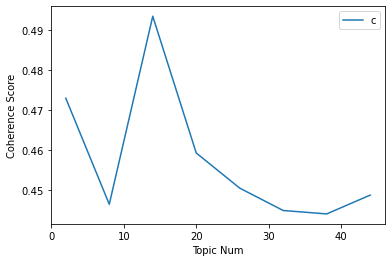

In [19]:
import matplotlib 
#matplotlib.rc('xtick', labelsize=12) 
#matplotlib.rc('ytick', labelsize=12)

#font = {'family' : 'sakkal majalla',
#        'weight' : 'normal',
#        'size'   : 16}

#matplotlib.rc('font', **font)
#from arabic_reshaper import arabic_reshaper
#from bidi.algorithm import get_display
#from matplotlib import pyplot as plt
#def f(x):
#    out=get_display( arabic_reshaper.reshape(x))
#    return(out)
# Show graph
limit=50; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel(("Topic Num"), alpha = 1)
plt.ylabel(("Coherence Score"), alpha = 1)
plt.legend(("coherence_values"), loc='best')
plt.show()

In [20]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.473
Num Topics = 8  has Coherence Value of 0.4466
Num Topics = 14  has Coherence Value of 0.4935
Num Topics = 20  has Coherence Value of 0.4594
Num Topics = 26  has Coherence Value of 0.4506
Num Topics = 32  has Coherence Value of 0.445
Num Topics = 38  has Coherence Value of 0.4441
Num Topics = 44  has Coherence Value of 0.4488


In [21]:
# Select the model and print the topics
optimal_model = model_list[5]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(3,
  '0.067*"فقال" + 0.017*"رسول" + 0.017*"النبي" + 0.010*"دينه" + 0.009*"المهم" + 0.009*"حب" + 0.008*"شقائق" + 0.008*"يبحث" + 0.008*"حاجة" + 0.008*"ذهب"'),
 (27,
  '0.034*"صالح" + 0.028*"الكبير" + 0.020*"الاستاذ" + 0.017*"منطقة" + 0.015*"اختيار" + 0.015*"يستحق" + 0.014*"عرف" + 0.012*"القصيم" + 0.011*"الفاضل" + 0.011*"كبير"'),
 (0,
  '0.031*"الصالح" + 0.018*"الحق" + 0.017*"الدين" + 0.012*"القيادة" + 0.012*"حقه" + 0.011*"يأتي" + 0.011*"وعدم" + 0.009*"وكم" + 0.008*"الحوادث" + 0.008*"العظام"'),
 (14,
  '0.027*"الوطن" + 0.027*"المخلصين" + 0.021*"البلاد" + 0.019*"صاحب" + 0.017*"الوطني" + 0.017*"عبدالرحمن" + 0.016*"الأمن" + 0.015*"بفضل" + 0.012*"سمو" + 0.012*"ذكرى"'),
 (8,
  '0.015*"غيره" + 0.013*"الإنسان" + 0.013*"عز" + 0.011*"يكتب" + 0.010*"النار" + 0.010*"المؤمن" + 0.009*"يزال" + 0.009*"عظمة" + 0.008*"وجل" + 0.008*"قوله"'),
 (26,
  '0.028*"الشيخ" + 0.026*"رئيس" + 0.016*"سعادة" + 0.015*"محافظة" + 0.012*"مجلس" + 0.012*"آخر" + 0.012*"الرس" + 0.009*"تحرير" + 0.009*"عبدالرحمن" + 0.009*"خبر"'

In [22]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,24.0,0.4111,"رجال, نفس, سلطان, وجد, جهود, المسلمين, المسلم,...",الرجل المسلم الشرعية وممارسة الضغط على حدد مسؤ...
1,1,2.0,0.0621,"المجتمع, خاصة, قوامة, الإسلام, الأسرة, سبحانه,...",الرسول عليه السلام كل بيمينك قال الرجل
2,2,6.0,0.0601,"نفسه, العلم, حمد, بالله, الأفذاذ, سبيل, اليه, ...",بينهما بعد ان تم زواج الرجل الكبير في السن الذ...
3,3,7.0,0.0475,"أمام, يرى, ترى, السر, بناء, وفاء, الزمن, تأتي,...",هذا الرجل من بكاء خوفا من محبوبته وحزنا
4,4,20.0,0.0660,"المخلصين, الطريق, اكثر, تعني, الكتابة, الحب, ا...",الرجل لا يكفي لنكتب من قصائدنا الجديدة
5,5,27.0,0.0458,"صالح, الكبير, الاستاذ, منطقة, اختيار, يستحق, ع...",ولايمكن ان نحكم على حضور الرجل فوق سلطة الرجل ...
6,6,25.0,0.0483,"العمل, يعمل, حياته, الآن, صورة, الماضي, الانتر...",انه صورة معبرة عن الرجل الذي تطمح
7,7,4.0,0.0486,"الكريم, خير, قام, الفذ, النبيل, عمل, سعد, الشه...",رابح وكلمة الرجل كما تعلم لا تصير اثنتين
8,8,3.0,0.0587,"فقال, رسول, النبي, دينه, المهم, حب, شقائق, يبح...",أن ذلك عائد إلى اختفاء الرجل من مشهد الرجل وال...
9,9,20.0,0.1211,"المخلصين, الطريق, اكثر, تعني, الكتابة, الحب, ا...",التحول الثقافي وتدجين مصطلح الكتابة النسائية ب...


In [23]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.3872,"الصالح, الحق, الدين, القيادة, حقه, يأتي, وعدم,...",إصابات الحوادث إصابات الحوادث كسور العظام الطو...
1,1.0,0.4071,"المناسب, المكان, وضع, ناصر, العامة, معالي, الم...",منبها إلى أن الريف يحتاج للمياه منبها إلى أن ا...
2,2.0,0.4457,"المجتمع, خاصة, قوامة, الإسلام, الأسرة, سبحانه,...",اضاءة والقول بأن المرأة هي المجتمع كله يعني أن...
3,3.0,0.3636,"فقال, رسول, النبي, دينه, المهم, حب, شقائق, يبح...",الرجل ود أبيه أي أصدقاءه وفي حديث الكبائر أن ي...
4,4.0,0.2672,"الكريم, خير, قام, الفذ, النبيل, عمل, سعد, الشه...",حان الوقت لتكريم هذا الرجل الداعم لفروسية منطق...


In [24]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,24.0,"رجال, نفس, سلطان, وجد, جهود, المسلمين, المسلم,...",190.0,0.0397
1.0,2.0,"المجتمع, خاصة, قوامة, الإسلام, الأسرة, سبحانه,...",180.0,0.0376
2.0,6.0,"نفسه, العلم, حمد, بالله, الأفذاذ, سبيل, اليه, ...",177.0,0.0370
3.0,7.0,"أمام, يرى, ترى, السر, بناء, وفاء, الزمن, تأتي,...",197.0,0.0412
4.0,20.0,"المخلصين, الطريق, اكثر, تعني, الكتابة, الحب, ا...",178.0,0.0372
...,...,...,...,...
4781.0,19.0,"عزيزتي, العدد, عنوان, الأخ, قرأت, الموضوع, تحم...",NaN,NaN
4782.0,31.0,"رحمه, الشيخ, رجلا, الدنيا, جميعا, كثيرة, رحم, ...",NaN,NaN
4783.0,14.0,"الوطن, المخلصين, البلاد, صاحب, الوطني, عبدالرح...",NaN,NaN
4784.0,6.0,"نفسه, العلم, حمد, بالله, الأفذاذ, سبيل, اليه, ...",NaN,NaN
